In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import graphviz
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree


ModuleNotFoundError: No module named 'graphviz'

In [126]:
churn_data = (pd.read_csv(
    'C:\\Users\\chiny\\OneDrive\\Documents\\Development\\Analytics\\Bank Customer Churn\\Customer-Churn-Records.csv'
    )
    .drop(columns=['RowNumber', 'Surname'])
    .set_index('CustomerId')
)

In [127]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory 

In [128]:
#Describe the dataframe
churn_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


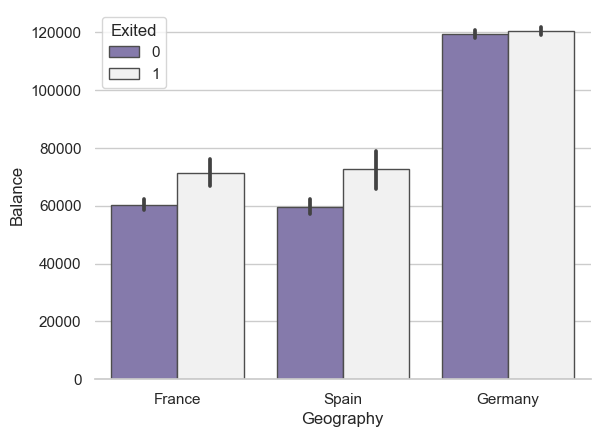

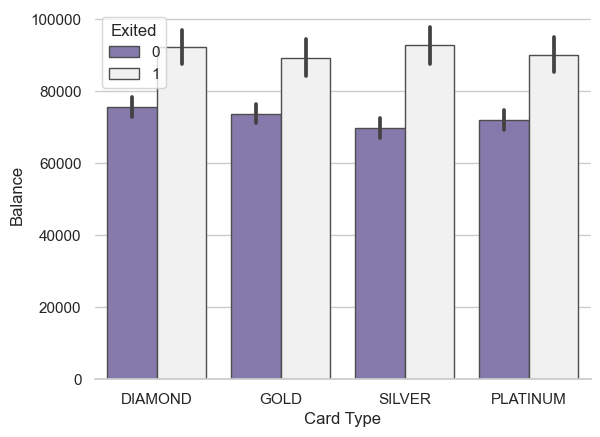

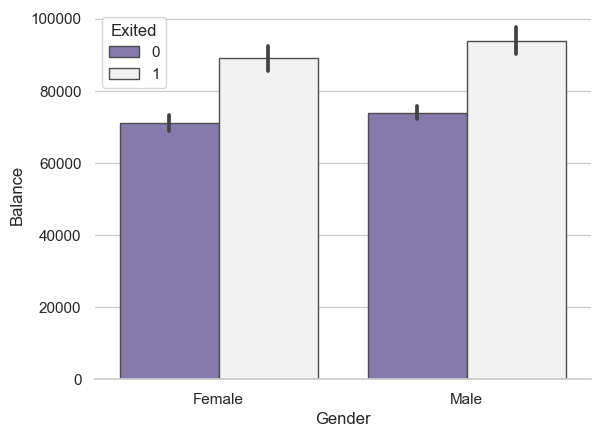

In [129]:
sns.set_theme(style="whitegrid")

i = ['Geography', 'Card Type', 'Gender']

for var in i:
    fig, ax = plt.subplots()
    sns.barplot(ax=ax, data=churn_data, x=var, y="Balance", hue="Exited", linewidth=1,palette="light:m_r",
    edgecolor=".3")
    sns.despine(left=True)
    plt.show()

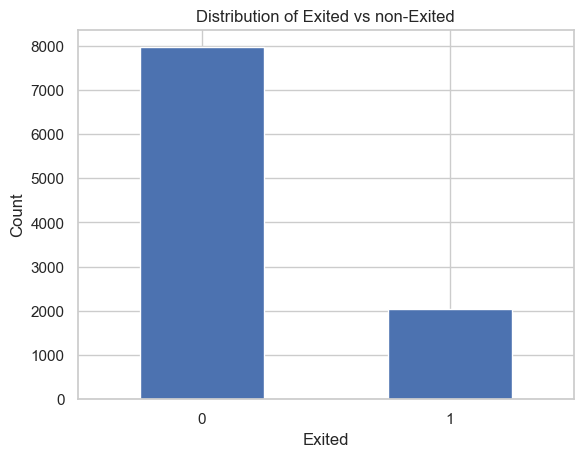

In [130]:
#exited vs count
churn_data['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Distribution of Exited vs non-Exited');


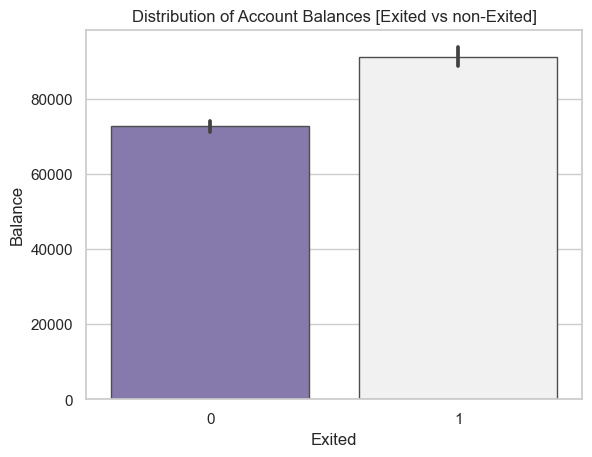

In [131]:
sns.barplot(data=churn_data, x='Exited', y="Balance", linewidth=1, palette="light:m_r",
    edgecolor=".3",);
plt.title('Distribution of Account Balances [Exited vs non-Exited]');

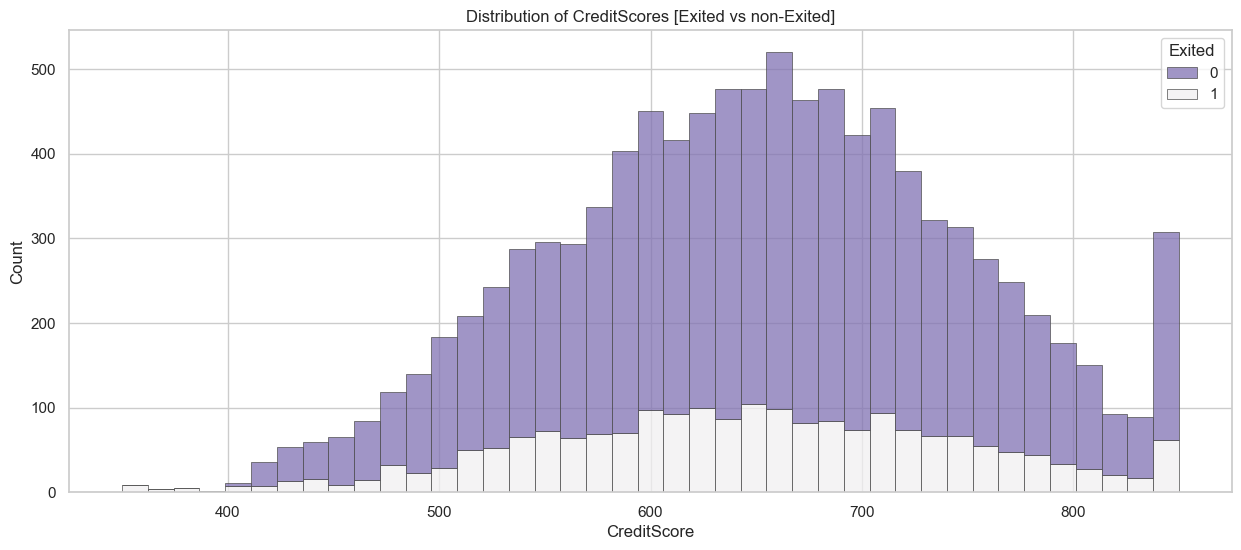

In [132]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(
    churn_data, x='CreditScore', hue = 'Exited',multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
);
ax.set(title='Distribution of CreditScores [Exited vs non-Exited]');

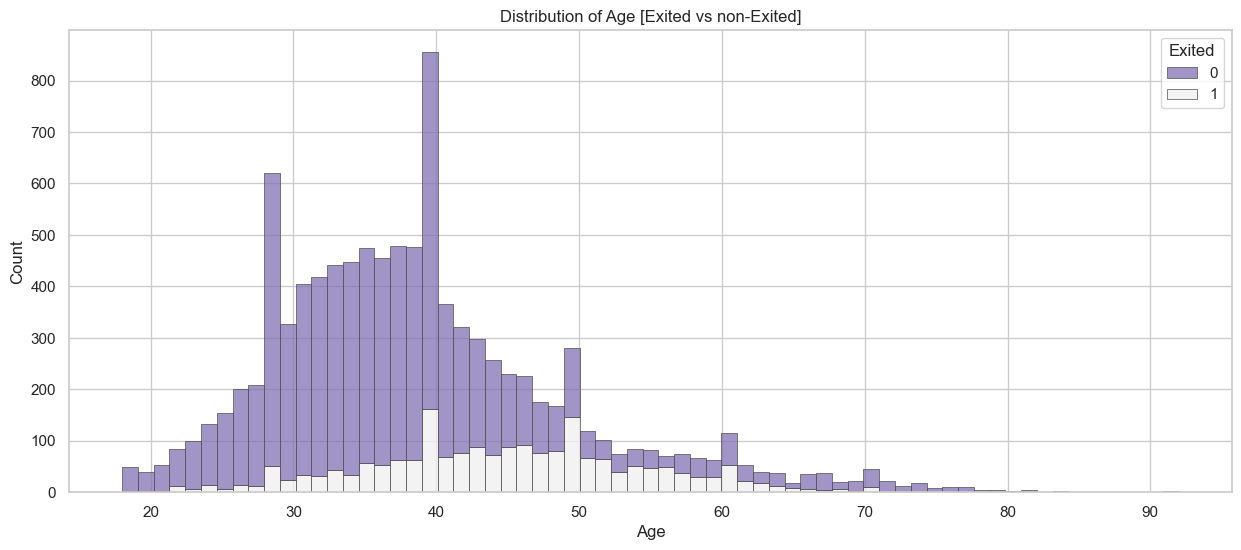

In [133]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(
    churn_data, x='Age', hue = 'Exited',multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
);
ax.set(title='Distribution of Age [Exited vs non-Exited]');

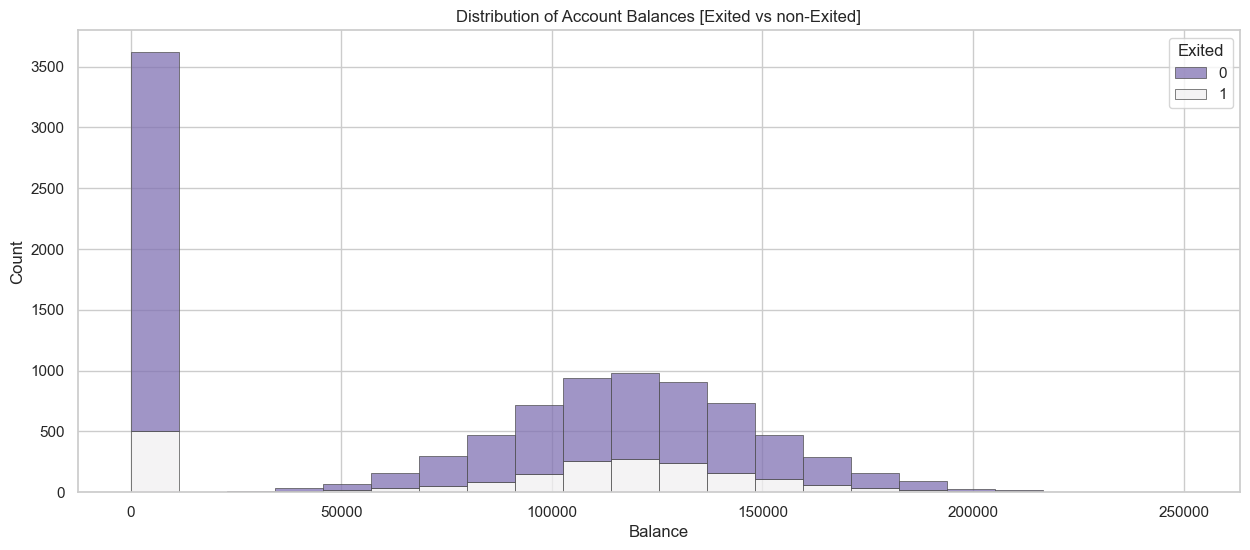

In [134]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(
    churn_data, x='Balance', hue = 'Exited',multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
);
ax.set(title='Distribution of Account Balances [Exited vs non-Exited]');

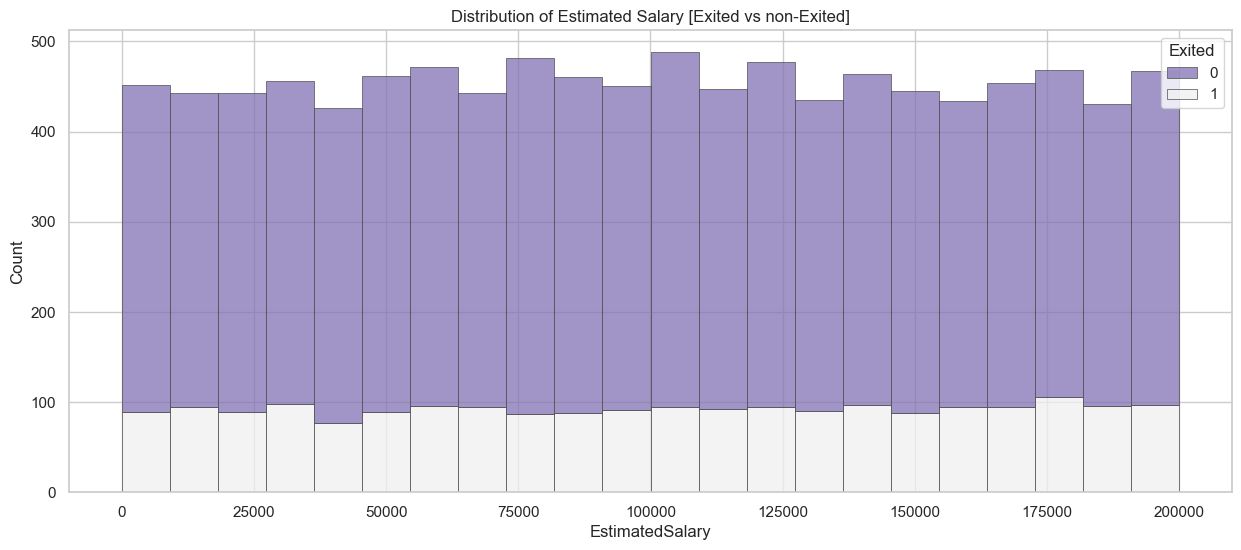

In [135]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(
    churn_data, x='EstimatedSalary', hue = 'Exited',multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
);
ax.set(title='Distribution of Estimated Salary [Exited vs non-Exited]');

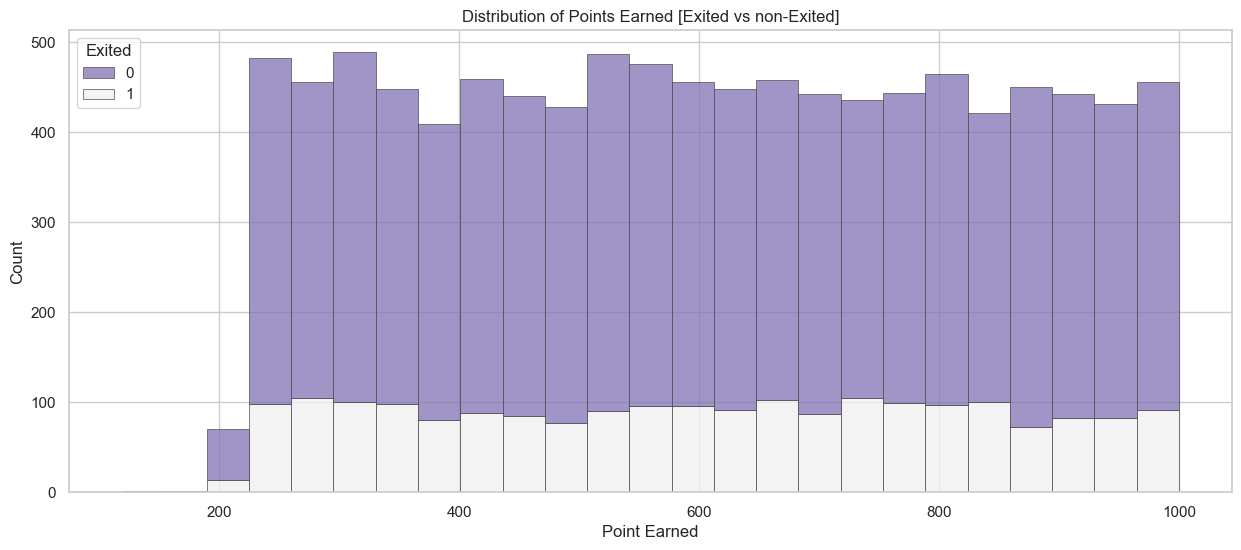

In [136]:
f, ax = plt.subplots(figsize=(15, 6))
sns.histplot(
    churn_data, x='Point Earned', hue = 'Exited',multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
);
ax.set(title='Distribution of Points Earned [Exited vs non-Exited]');

<Axes: >

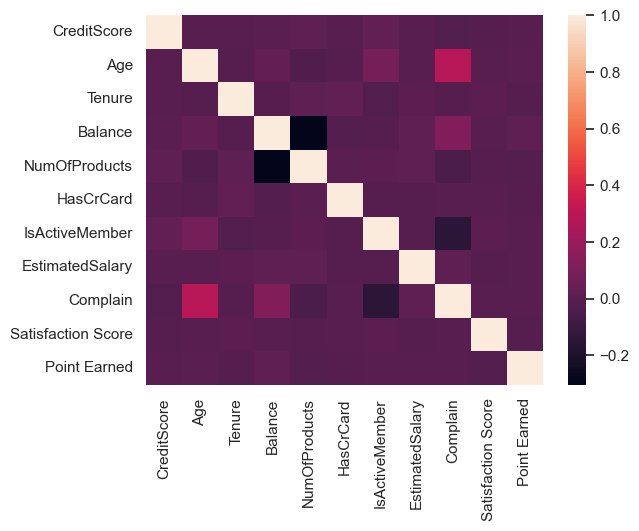

In [137]:
corr = (churn_data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                    'IsActiveMember', 'EstimatedSalary', 'Complain',
                    'Satisfaction Score', 'Point Earned']].corr())
sns.heatmap(corr)

In [138]:
#Check Cardinality
churn_data.select_dtypes('object').nunique()

Geography    3
Gender       2
Card Type    4
dtype: int64

LOGISTIC REGRESSION

In [139]:
#churn_data = churn_data[churn_data['Balance'] > 0]

In [140]:
target = "Exited"
X = churn_data.drop(columns = [target, 'Complain'])
y = churn_data[target]

In [155]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [156]:
# Build model
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(with_mean=False),
    LogisticRegression()
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Geography', 'Gender', 'Card Type'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

In [157]:
#Baseline Accuracy
acc_baseline = round(y_train.value_counts(normalize=True).max() * 100,2)
print(f'The baseline accuracy is {acc_baseline}%')

The baseline accuracy is 79.53%


In [158]:
accuracy_train = model_lr.score(X_train, y_train)
print(f'Training Accuracy: {(accuracy_train * 100).round(2)}%')

Training Accuracy: 81.23%


In [166]:
# Performance on Validation Data
accuracy_val = model_lr.score(X_val, y_val)
print(f'Validation Accuracy: {(accuracy_val * 100).round(2)}%')


Validation Accuracy: 81.85%


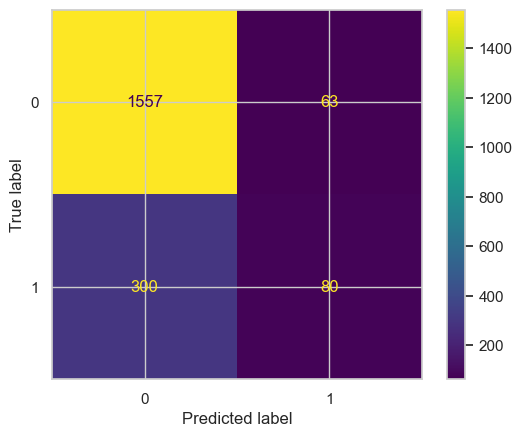

In [160]:
ConfusionMatrixDisplay.from_estimator(model_lr, X_val, y_val);

DECISION TREE

In [161]:
depth = range(1,16)

accuracy_train = []
accuracy_val = []

for d in depth:
    model_dt = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )

    model_dt.fit(X_train, y_train)

    accuracy_train.append(model_dt.score(X_train, y_train))

    accuracy_val.append(model_dt.score(X_val, y_val))


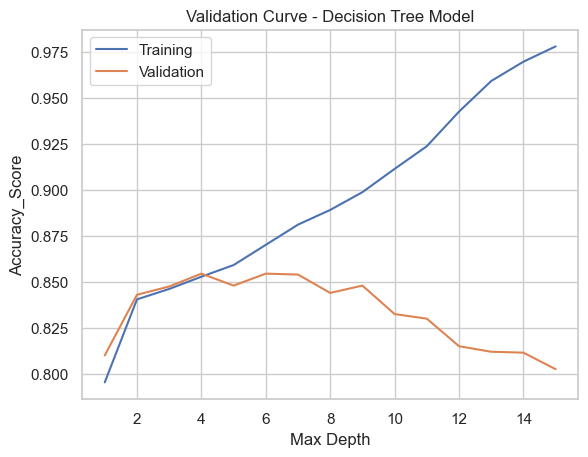

In [162]:
plt.plot(depth, accuracy_train, label='Training')
plt.plot(depth, accuracy_val, label='Validation')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy_Score')
plt.title('Validation Curve - Decision Tree Model')
plt.legend();

In [163]:
model_dt_final = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=4, random_state=42)
)

model_dt_final.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Geography', 'Gender', 'Card Type'],
                                mapping=[{'col': 'Geography',
                                          'data_type': dtype('O'),
                                          'mapping': Germany    1
France     2
Spain      3
NaN       -2
dtype: int64},
                                         {'col': 'Gender',
                                          'data_type': dtype('O'),
                                          'mapping': Female    1
Male      2
NaN      -2
dtype: int64},
                                         {'col': 'Card Type',
                                          'data_type': dtype('O'),
                                          'mapping': PLATINUM    1
SILVER      2
DIAMOND     3
GOLD        4
NaN        -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [180]:
accuracy_test = model_dt_final.score(X_test, y_test)
print(f'Testing Accuracy: {(accuracy_test * 100).round(2)}%')

Testing Accuracy: 84.8%


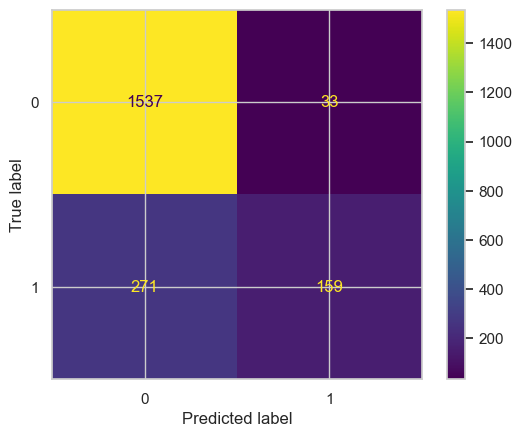

In [181]:
ConfusionMatrixDisplay.from_estimator(model_dt_final, X_test, y_test);

In [193]:
features_dt = X_train.columns
importances_dt = model_dt_final.named_steps['decisiontreeclassifier'].feature_importances_
feat_imp_dt = pd.Series(importances_dt, index = features_dt).sort_values()
feat_imp_dt.tail()

Balance            0.016382
EstimatedSalary    0.018473
IsActiveMember     0.172263
NumOfProducts      0.341590
Age                0.451292
dtype: float64

In [194]:
features_lr = model_lr.named_steps['onehotencoder'].get_feature_names_out()
importances_lr = model_lr.named_steps['logisticregression'].coef_[0]
feat_imp_lr = pd.Series(np.exp(importances_lr), index=features_lr).sort_values()
feat_imp_lr.tail()

Card Type_DIAMOND    1.049681
Gender_Female        1.126117
Balance              1.208781
Geography_Germany    1.264223
Age                  2.100597
dtype: float64

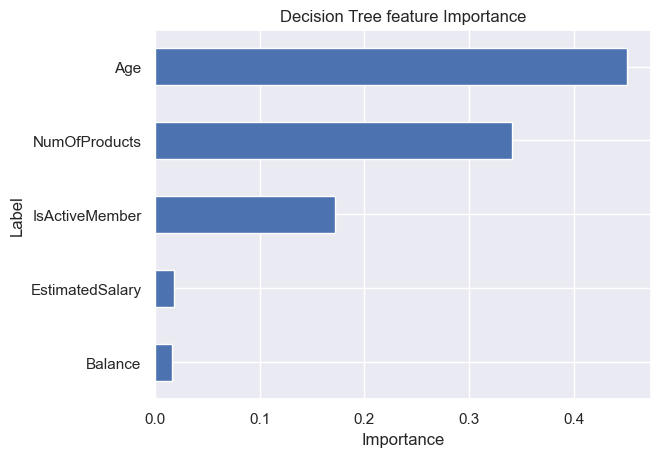

In [203]:
feat_imp_dt.tail().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Label')
plt.title('Decision Tree feature Importance');

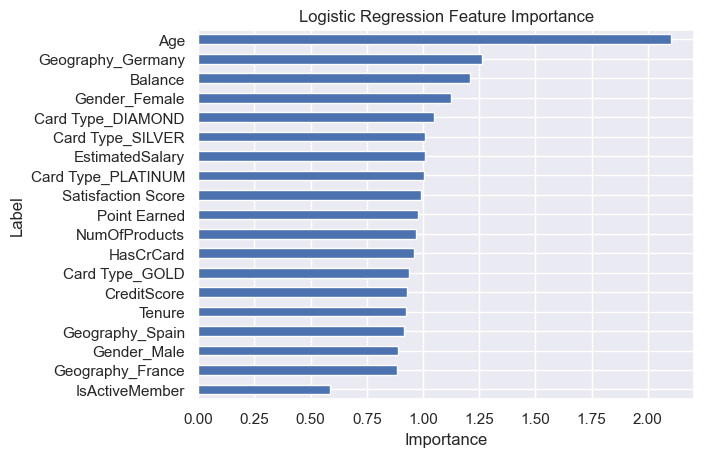

In [204]:
feat_imp_lr.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Label')
plt.title('Logistic Regression Feature Importance');

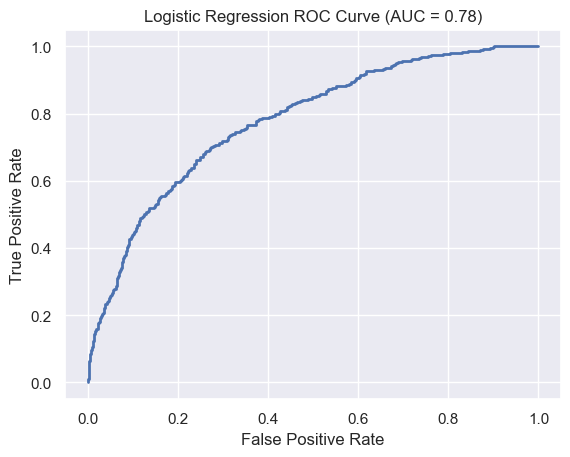

In [219]:
# 3. ROC Curve
predicted_probabilities = model_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2)
plt.plot(linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression ROC Curve (AUC = {roc_auc.round(2)})');

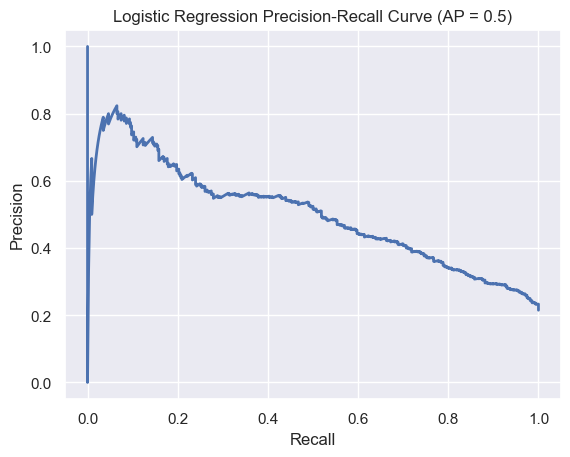

In [220]:
precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)
average_precision = average_precision_score(y_test, predicted_probabilities)
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Logistic Regression Precision-Recall Curve (AP = {average_precision.round(2)})');


In [ ]:


# Visualize the decision tree
dot_data = graphviz.Source(
    export_graphviz(
        model_dt_final, 
        feature_names=X_train.columns),
        class_names=['Negative', 'Positive'],
        filled=True, 
        rounded=True
    )
)
dot_data.render(filename='decision_tree', format='png', cleanup=True)  # You can change the format as needed
dot_data.view()